# Import Libraries

In [1]:
import math
import random
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import  GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.neural_network import MLPClassifier


# Result storage

In [2]:
results_overview = {}
predictions_per_model = {}

# Data Loading

In [3]:
df_data_train = pd.read_csv('./Data/breast-cancer-diagnostic.shuf.lrn.csv', low_memory=False, sep=',')
df_data_test = pd.read_csv('./Data/breast-cancer-diagnostic.shuf.tes.csv', low_memory=False, sep=',')

In [4]:
df_data_train.head()

,ID,MALIGNANT,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,868682,False,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,...,12.32,22.02,79.93,462.0,0.1190,0.1648,0.1399,0.08476,0.2676,0.06765
1,881972,True,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,...,19.59,24.89,133.50,1189.0,0.1703,0.3934,0.5018,0.25430,0.3109,0.09061
2,901315,False,10.57,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,...,10.85,22.82,76.51,351.9,0.1143,0.3619,0.6030,0.14650,0.2597,0.12000
3,9112367,False,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.1390,0.06005,0.2444,0.06788
4,8711202,True,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,...,20.47,25.11,132.90,1302.0,0.1418,0.3498,0.3583,0.15150,0.2463,0.07738


# Class Distribution

False    189
True      96
Name: MALIGNANT, dtype: int64

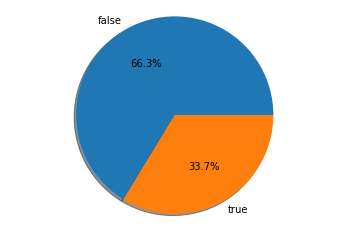

In [5]:
display(df_data_train['MALIGNANT'].value_counts())

plt.pie( df_data_train['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

In [6]:
df_data_train.isnull().sum()

ID                         0
MALIGNANT                  0
radiusMean                 0
 textureMean               0
 perimeterMean             0
 areaMean                  0
 smoothnessMean            0
 compactnessMean           0
 concavityMean             0
 concavePointsMean         0
 symmetryMean              0
 fractalDimensionMean      0
 radiusStdErr              0
 textureStdErr             0
 perimeterStdErr           0
 areaStdErr                0
 smoothnessStdErr          0
 compactnessStdErr         0
 concavityStdErr           0
 concavePointsStdErr       0
 symmetryStdErr            0
 fractalDimensionStdErr    0
 radiusWorst               0
 textureWorst              0
 perimeterWorst            0
 areaWorst                 0
 smoothnessWorst           0
 compactnessWorst          0
 concavityWorst            0
 concavePointsWorst        0
 symmetryWorst             0
 fractalDimensionWorst     0
dtype: int64

# Data Preprocessing

In [7]:
df_train = df_data_train.copy()

#Feature columns
columns = sorted(set(df_data_train.columns) - set(['ID','MALIGNANT']))

#Create feature matrix
X = df_train[columns]

#Create target column
Y = df_train['MALIGNANT']

#Create test matrix
X_test = df_data_test[columns]

# Linear Model: Different Parameters

In [8]:
clf = LogisticRegression()

parameter_grid = {
    'penalty': ['l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200,250]
}
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print("Best Parameter Choice:")
print(cv_grid.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1744s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1016s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1087s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 120 | elapsed:    3.4s remaining:    0.6s


Best Parameter Choice:
{'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.9s finished
C:\anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


# Linear Model: Results overview

In [9]:
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(1)

selected_columns = [
    'param_penalty',
    'param_solver',
    'param_max_iter',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_fit_time'
]
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(10)[selected_columns]
df_result = df_result.rename(columns={
    'param_estimator_penalty': "penalty",
    'param_estimator_solver': "solver",
    'param_estimator_max_iter': "max_iter",
    "mean_test_accuracy": "accuracy",
    "mean_test_precision": "precision",
    "mean_test_recall": "recall",
    "mean_fit_time": "fit_time"
})


for col in df_result.columns:
    if df_result[col].dtype == np.float64:
        df_result[col] = df_result[col].apply(lambda x: '{0:.3f}'.format(round(x,3)))
df_result

,param_penalty,param_solver,param_max_iter,accuracy,precision,recall,fit_time
35,none,newton-cg,250,0.968,0.979,0.927,0.153
25,none,newton-cg,200,0.968,0.979,0.927,0.148
15,none,newton-cg,100,0.968,0.979,0.927,0.194
5,none,newton-cg,50,0.965,0.958,0.938,0.068
36,none,lbfgs,250,0.951,0.956,0.896,0.050
0,l2,newton-cg,50,0.944,0.929,0.906,0.094
11,l2,lbfgs,100,0.944,0.930,0.906,0.052
30,l2,newton-cg,250,0.944,0.929,0.906,0.121
16,none,lbfgs,100,0.944,0.927,0.906,0.050
20,l2,newton-cg,200,0.944,0.929,0.906,0.129


# Linear Model: Prediction

In [10]:
clf = make_pipeline( LogisticRegression(max_iter= 100, penalty = 'none', solver = 'newton-cg' ))
clf.fit(X, Y)

# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring = ['accuracy', 'precision', 'recall'], n_jobs=-1)

results_overview['Linear Model'] = {
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean(),
    'fit_time' : cv_result['fit_time'].mean()
    }
predictions_per_model = {}

display(results_overview['Linear Model'])

# Predict
y_prediction = clf.predict(X_test)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

predictions_per_model['Linear Model'] = {
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
    }

display(predictions_per_model['Linear Model'])

C:\anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


{'accuracy': 0.968421052631579,
 'precision': 0.9788306451612904,
 'recall': 0.9270833333333334,
 'fit_time': 0.17835338910420737}

{'false': 174, 'false %': 61, 'true': 110, 'true %': 39}

False    174
True     110
Name: MALIGNANT, dtype: int64

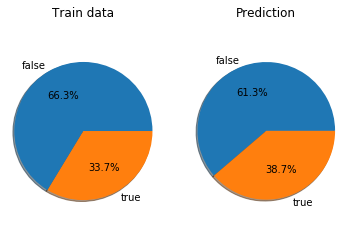

In [11]:
df_solution_test = pd.DataFrame(y_prediction, columns = ['MALIGNANT'])

display(df_solution_test['MALIGNANT'].value_counts())

fig, axs = plt.subplots(1, 2)

axs[0].pie( df_data_train['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
axs[0].axis('equal')
axs[0].set_title("Train data")


axs[1].pie(df_solution_test['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
axs[1].axis('equal')
axs[1].set_title("Prediction")


plt.show()

# Random Forrest: Different Parameters

In [12]:
clf = RandomForestClassifier()

parameter_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 30, 50]
}
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print("Best Parameter Choice:")
print(cv_grid.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1695s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.9s


Best Parameter Choice:
{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    6.8s finished


# Random Forrest: Result overview

In [13]:
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(1)

selected_columns = [
    'param_criterion',
    'param_max_depth',
    'param_n_estimators',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_fit_time'
]
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(10)[selected_columns]
df_result = df_result.rename(columns={
    'param_criterion': "criterion",
    'param_max_depth': "max_depth",
    'param_n_estimators': "n_estimators",
    "mean_test_accuracy": "accuracy",
    "mean_test_precision": "precision",
    "mean_test_recall": "recall",
    "mean_fit_time": "fit_time"
})


for col in df_result.columns:
    if df_result[col].dtype == np.float64:
        df_result[col] = df_result[col].apply(lambda x: '{0:.3f}'.format(round(x,3)))
df_result

,criterion,max_depth,n_estimators,accuracy,precision,recall,fit_time
25,entropy,30,50,0.975,0.980,0.948,0.160
0,gini,None,10,0.975,0.989,0.938,0.033
5,gini,20,50,0.975,0.989,0.938,0.117
29,entropy,50,50,0.975,0.989,0.938,0.145
23,entropy,20,200,0.975,0.989,0.938,0.581
31,entropy,50,200,0.975,0.989,0.938,0.427
18,entropy,None,100,0.972,0.989,0.927,0.247
2,gini,None,100,0.972,0.978,0.938,0.252
3,gini,None,200,0.972,0.978,0.938,0.509
21,entropy,20,50,0.972,0.968,0.948,0.165


# Random Forrest: Prediction

In [14]:
clf = make_pipeline( RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=50))
clf.fit(X, Y)

# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring = ['accuracy', 'precision', 'recall'], n_jobs=-1)

results_overview['RandomForest'] = {
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean(),
    'fit_time' : cv_result['fit_time'].mean()
    }

display(results_overview['RandomForest'])

# Predict
y_prediction = clf.predict(X_test)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

predictions_per_model['RandomForest'] = {
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
    }

display(predictions_per_model['RandomForest'])

{'accuracy': 0.975438596491228,
 'precision': 0.9780890804597702,
 'recall': 0.9479166666666666,
 'fit_time': 0.09883379936218262}

{'false': 176, 'false %': 62, 'true': 108, 'true %': 38}

False    176
True     108
Name: MALIGNANT, dtype: int64

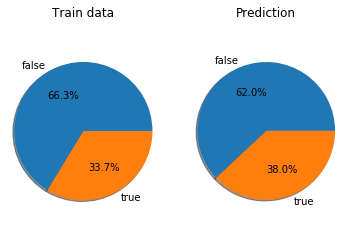

In [15]:
df_solution_test = pd.DataFrame(y_prediction, columns = ['MALIGNANT'])

display(df_solution_test['MALIGNANT'].value_counts())

fig, axs = plt.subplots(1, 2)

axs[0].pie( df_data_train['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
axs[0].axis('equal')
axs[0].set_title("Train data")


axs[1].pie(df_solution_test['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
axs[1].axis('equal')
axs[1].set_title("Prediction")


plt.show()

# SVM: Different Parameters

In [16]:
clf = SVC()

parameter_grid= {
    'C': [x for x in np.linspace(start = 0.1, stop = 1.0, num = 25)],
    'gamma': ['auto','scale'],
    'kernel' : ['linear','poly','sgmoid','rbf']
    
}
                     
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0831s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1126s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.8421s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  

{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


In [17]:
selected_columns = [
    'param_C',
    'param_gamma',
    'param_kernel',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_fit_time'
]
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(10)[selected_columns]
df_result = df_result.rename(columns={
    'param_C': "C",
    'param_gamma': "gamma",
    'param_kernel': "kernel",
    "mean_test_accuracy": "accuracy",
    "mean_test_precision": "precision",
    "mean_test_recall": "recall",
    "mean_fit_time": "fit_time"
})


for col in df_result.columns:
    if df_result[col].dtype == np.float64:
        df_result[col] = df_result[col].apply(lambda x: '{0:.3f}'.format(round(x,3)))
df_result

,C,gamma,kernel,accuracy,precision,recall,fit_time
137,0.7375,auto,poly,0.961,0.959,0.927,9.178
161,0.85,auto,poly,0.961,0.959,0.927,8.428
121,0.6625,auto,poly,0.961,0.959,0.927,7.914
41,0.2875,auto,poly,0.961,0.959,0.927,7.877
129,0.7,auto,poly,0.961,0.959,0.927,8.218
73,0.4375,auto,poly,0.961,0.959,0.927,8.629
33,0.25,auto,poly,0.961,0.959,0.927,7.466
105,0.5875,auto,poly,0.961,0.959,0.927,8.737
145,0.775,auto,poly,0.961,0.959,0.927,10.535
1,0.1,auto,poly,0.961,0.959,0.927,7.804


In [18]:
clf = SVC()

parameter_grid= {
    'C': [x for x in np.linspace(start = 0.7, stop = 0.8, num = 10)],
    'gamma': ['auto'],
    'kernel' : ['poly']
    
}
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   57.3s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


{'C': 0.7, 'gamma': 'auto', 'kernel': 'poly'}


In [19]:
selected_columns = [
    'param_C',
    'param_gamma',
    'param_kernel',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_fit_time'
]
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(10)[selected_columns]
df_result = df_result.rename(columns={
    'param_C': "C",
    'param_gamma': "gamma",
    'param_kernel': "kernel",
    "mean_test_accuracy": "accuracy",
    "mean_test_precision": "precision",
    "mean_test_recall": "recall",
    "mean_fit_time": "fit_time"
})


for col in df_result.columns:
    if df_result[col].dtype == np.float64:
        df_result[col] = df_result[col].apply(lambda x: '{0:.3f}'.format(round(x,3)))
df_result

,C,gamma,kernel,accuracy,precision,recall,fit_time
0,0.7,auto,poly,0.961,0.959,0.927,8.289
1,0.711111,auto,poly,0.961,0.959,0.927,8.409
2,0.722222,auto,poly,0.961,0.959,0.927,8.461
3,0.733333,auto,poly,0.961,0.959,0.927,8.360
4,0.744444,auto,poly,0.961,0.959,0.927,8.321
5,0.755556,auto,poly,0.961,0.959,0.927,8.234
6,0.766667,auto,poly,0.961,0.959,0.927,8.486
7,0.777778,auto,poly,0.961,0.959,0.927,8.616
8,0.788889,auto,poly,0.961,0.959,0.927,7.903
9,0.8,auto,poly,0.961,0.959,0.927,6.118


In [20]:
clf = SVC()

parameter_grid= {
    'C': [x for x in np.linspace(start = 0.6, stop = 0.7, num = 10)],
    'gamma': ['auto'],
    'kernel' : ['poly']
    
}
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)   

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.1min remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


{'C': 0.6, 'gamma': 'auto', 'kernel': 'poly'}


In [21]:
selected_columns = [
    'param_C',
    'param_gamma',
    'param_kernel',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_fit_time'
]
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(10)[selected_columns]
df_result = df_result.rename(columns={
    'param_C': "C",
    'param_gamma': "gamma",
    'param_kernel': "kernel",
    "mean_test_accuracy": "accuracy",
    "mean_test_precision": "precision",
    "mean_test_recall": "recall",
    "mean_fit_time": "fit_time"
})


for col in df_result.columns:
    if df_result[col].dtype == np.float64:
        df_result[col] = df_result[col].apply(lambda x: '{0:.3f}'.format(round(x,3)))
df_result

,C,gamma,kernel,accuracy,precision,recall,fit_time
0,0.6,auto,poly,0.961,0.959,0.927,8.811
1,0.611111,auto,poly,0.961,0.959,0.927,8.966
2,0.622222,auto,poly,0.961,0.959,0.927,8.828
3,0.633333,auto,poly,0.961,0.959,0.927,8.923
4,0.644444,auto,poly,0.961,0.959,0.927,9.581
5,0.655556,auto,poly,0.961,0.959,0.927,9.708
6,0.666667,auto,poly,0.961,0.959,0.927,9.676
7,0.677778,auto,poly,0.961,0.959,0.927,9.875
8,0.688889,auto,poly,0.961,0.959,0.927,9.083
9,0.7,auto,poly,0.961,0.959,0.927,6.512


In [22]:
clf = SVC()

parameter_grid= {
    'C': [x for x in np.linspace(start = 0.01, stop = 0.99, num = 100)]    
}

cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)            

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0166s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0166s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0458s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1998s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s


{'C': 0.6732323232323232}


[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 293 out of 300 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.9s finished


In [23]:
selected_columns = [
    'param_C',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_fit_time'
]
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(10)[selected_columns]
df_result = df_result.rename(columns={
    'param_C': "C",
    "mean_test_accuracy": "accuracy",
    "mean_test_precision": "precision",
    "mean_test_recall": "recall",
    "mean_fit_time": "fit_time"
})


for col in df_result.columns:
    if df_result[col].dtype == np.float64:
        df_result[col] = df_result[col].apply(lambda x: '{0:.3f}'.format(round(x,3)))
df_result

,C,accuracy,precision,recall,fit_time
99,0.99,0.926,0.989,0.792,0.005
74,0.742525,0.926,0.989,0.792,0.001
81,0.811818,0.926,0.989,0.792,0.010
80,0.801919,0.926,0.989,0.792,0.008
79,0.79202,0.926,0.989,0.792,0.000
78,0.782121,0.926,0.989,0.792,0.001
77,0.772222,0.926,0.989,0.792,0.002
75,0.752424,0.926,0.989,0.792,0.001
73,0.732626,0.926,0.989,0.792,0.007
83,0.831616,0.926,0.989,0.792,0.000


# SVM: Different Scaling

In [24]:
clf = make_pipeline(SVC(C = 0.01,gamma='auto',kernel='poly'))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.97894737 0.94736842 0.95789474]
0.9614035087719298


In [25]:
clf = make_pipeline(StandardScaler(),SVC(C = 0.01,gamma='auto',kernel='poly'))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.73684211 0.76842105 0.67368421]
0.7263157894736841


In [26]:
clf = make_pipeline(RobustScaler(),SVC(C = 0.01,gamma='auto',kernel='poly'))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.72631579 0.76842105 0.66315789]
0.7192982456140351


# SVM: Prediction

In [27]:
clf = make_pipeline(SVC(C = 0.01,gamma='auto',kernel='poly'))
clf.fit(X, Y)
# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

results_overview['SVC'] = {
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean(),
    'fit_time' : cv_result['fit_time'].mean()
}

display(results_overview['SVC'])

# Predict
y_prediction = clf.predict(X_test)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

predictions_per_model['SVC'] = {
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}
display(predictions_per_model['SVC'])

{'accuracy': 0.9614035087719298,
 'precision': 0.9585858585858587,
 'recall': 0.9270833333333334,
 'fit_time': 4.600343783696492}

{'false': 180, 'false %': 63, 'true': 104, 'true %': 37}

False    180
True     104
Name: MALIGNANT, dtype: int64

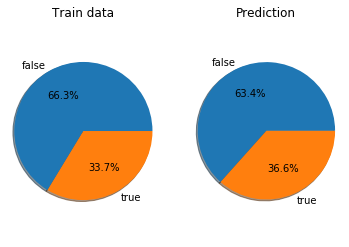

In [28]:
df_solution_test = pd.DataFrame(y_prediction, columns = ['MALIGNANT'])

display(df_solution_test['MALIGNANT'].value_counts())

fig, axs = plt.subplots(1, 2)

axs[0].pie( df_data_train['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
axs[0].axis('equal')
axs[0].set_title("Train data")


axs[1].pie(df_solution_test['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
axs[1].axis('equal')
axs[1].set_title("Prediction")


plt.show()

# NuSVC: Different Parameter

In [29]:
clf = NuSVC()

parameter_grid= {
    'nu': [x for x in np.linspace(start = 0.01, stop = 0.99, num = 100)]    
}
                     
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0156s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0313s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0472s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1335s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 246 tasks      | elapsed:    0.7s


{'nu': 0.06939393939393938}


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.9s finished


In [30]:
selected_columns = [
    'param_nu',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_fit_time'
]
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(10)[selected_columns]
df_result = df_result.rename(columns={
    'param_nu': "nu",
    "mean_test_accuracy": "accuracy",
    "mean_test_precision": "precision",
    "mean_test_recall": "recall",
    "mean_fit_time": "fit_time"
})


for col in df_result.columns:
    if df_result[col].dtype == np.float64:
        df_result[col] = df_result[col].apply(lambda x: '{0:.3f}'.format(round(x,3)))
df_result

,nu,accuracy,precision,recall,fit_time
6,0.0693939,0.951,0.923,0.938,0.005
11,0.118889,0.947,0.957,0.885,0.005
18,0.188182,0.947,0.988,0.854,0.010
17,0.178283,0.947,0.988,0.854,0.007
12,0.128788,0.944,0.967,0.865,0.005
10,0.10899,0.944,0.956,0.875,0.002
15,0.158485,0.944,0.977,0.854,0.010
7,0.0792929,0.944,0.929,0.906,0.007
16,0.168384,0.940,0.967,0.854,0.001
14,0.148586,0.940,0.967,0.854,0.005


# NuSVC: Different Scaling

In [31]:
clf = make_pipeline(NuSVC(nu=0.06939393939393938))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.93684211 0.94736842 0.96842105]
0.9508771929824561


In [32]:
clf = make_pipeline(StandardScaler(), NuSVC(nu=0.06939393939393938))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.95789474 0.98947368 0.97894737]
0.975438596491228


In [33]:
clf = make_pipeline(RobustScaler(), NuSVC(nu=0.06939393939393938))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.95789474 0.98947368 0.97894737]
0.975438596491228


In [34]:
clf = make_pipeline(MinMaxScaler(), NuSVC(nu=0.06939393939393938))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.95789474 0.98947368 0.97894737]
0.975438596491228


# NuSVC: Prediction

In [44]:
clf = make_pipeline(StandardScaler(), NuSVC(nu=0.06939393939393938))
clf.fit(X, Y)

# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
results_overview['NuSVC'] = {
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean(),
    'fit_time' : cv_result['fit_time'].mean()
}

display(results_overview['NuSVC'])

# Predict
y_prediction = clf.predict(X_test)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

predictions_per_model['NuSVC'] = {
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}

display(predictions_per_model['NuSVC'])

{'accuracy': 0.975438596491228,
 'precision': 0.9784722222222223,
 'recall': 0.9479166666666666,
 'fit_time': 0.0}

{'false': 174, 'false %': 61, 'true': 110, 'true %': 39}

False    174
True     110
Name: MALIGNANT, dtype: int64

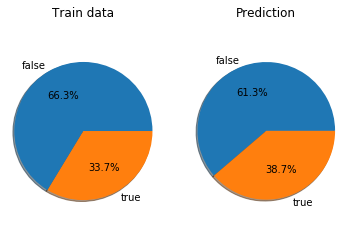

In [45]:
df_solution_test = pd.DataFrame(y_prediction, columns = ['MALIGNANT'])

display(df_solution_test['MALIGNANT'].value_counts())

fig, axs = plt.subplots(1, 2)

axs[0].pie( df_data_train['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
axs[0].axis('equal')
axs[0].set_title("Train data")


axs[1].pie(df_solution_test['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
axs[1].axis('equal')
axs[1].set_title("Prediction")


plt.show()

# Neural Network: Different Parameters

In [37]:
clf = MLPClassifier()

parameter_grid= {
    'max_iter': [10,50,100,150,200,300,1000],
    'hidden_layer_sizes' : [(2,2),(3,3),(10,4)]
}
                     
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0343s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  56 out of  63 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    4.2s finished


{'hidden_layer_sizes': (10, 4), 'max_iter': 150}


C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [38]:
selected_columns = [
    'param_max_iter',
    'param_hidden_layer_sizes',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_fit_time'
]
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(10)[selected_columns]
df_result = df_result.rename(columns={
    'param_max_iter': "max_iter",
    'param_hidden_layer_sizes': "hidden_layer",
    "mean_test_accuracy": "accuracy",
    "mean_test_precision": "precision",
    "mean_test_recall": "recall",
    "mean_fit_time": "fit_time"
})


for col in df_result.columns:
    if df_result[col].dtype == np.float64:
        df_result[col] = df_result[col].apply(lambda x: '{0:.3f}'.format(round(x,3)))
df_result

,max_iter,hidden_layer,accuracy,precision,recall,fit_time
17,150,"(10, 4)",0.832,0.981,0.510,0.173
15,50,"(10, 4)",0.761,0.768,0.635,0.081
3,150,"(2, 2)",0.744,0.445,0.531,0.172
20,1000,"(10, 4)",0.740,0.762,0.844,0.614
18,200,"(10, 4)",0.712,0.731,0.812,0.191
12,300,"(3, 3)",0.695,0.465,0.604,0.523
13,1000,"(3, 3)",0.670,0.333,0.021,0.042
19,300,"(10, 4)",0.663,0.000,0.000,0.414
14,10,"(10, 4)",0.639,0.150,0.323,0.021
0,10,"(2, 2)",0.572,0.446,0.385,0.017


In [39]:
clf = MLPClassifier(hidden_layer_sizes=(2,2), max_iter = 1000)

clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.66315789 0.66315789 0.87368421]
0.7333333333333334


# MLP: Prediction

In [47]:
clf = MLPClassifier(hidden_layer_sizes=(10,4), max_iter = 1000)
clf.fit(X, Y)

# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

results_overview['MLP'] ={
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean(),
    'fit_time' : cv_result['fit_time'].mean()
}

display(results_overview['MLP'])

# Predict
y_prediction = clf.predict(X_test)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

predictions_per_model['MLP'] = {
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}

display(predictions_per_model['MLP'])

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'accuracy': 0.4561403508771929,
 'precision': 0.4247042364001428,
 'recall': 0.8020833333333334,
 'fit_time': 0.15976174672444662}

{'false': 178, 'false %': 63, 'true': 106, 'true %': 37}

False    178
True     106
Name: MALIGNANT, dtype: int64

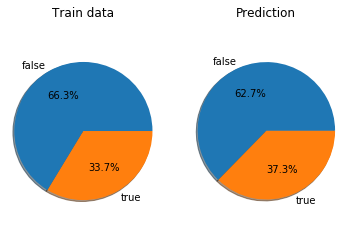

In [48]:
df_solution_test = pd.DataFrame(y_prediction, columns = ['MALIGNANT'])

display(df_solution_test['MALIGNANT'].value_counts())

fig, axs = plt.subplots(1, 2)

axs[0].pie( df_data_train['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
axs[0].axis('equal')
axs[0].set_title("Train data")


axs[1].pie(df_solution_test['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
axs[1].axis('equal')
axs[1].set_title("Prediction")


plt.show()

# Result overview

In [49]:
pd.DataFrame.from_dict(results_overview).T

,accuracy,precision,recall,fit_time
Linear Model,0.968421,0.978831,0.927083,0.178353
RandomForest,0.975439,0.978089,0.947917,0.098834
SVC,0.961404,0.958586,0.927083,4.600344
NuSVC,0.975439,0.978472,0.947917,0.000000
MLP,0.456140,0.424704,0.802083,0.159762


In [43]:
pd.DataFrame.from_dict(predictions_per_model).T

,false,false %,true,true %
Linear Model,174,61,110,39
RandomForest,176,62,108,38
SVC,180,63,104,37
NuSVC,174,61,110,39
MLP,180,63,104,37
